## Chapitre 2 — Optimisation numérique sans contraintes

### 3- Expérimentations sur la Fonction de Himmelblau

$$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$$

    Cette fonction est utilisée pour tester les algorithmes d'optimisation car elle présente plusieurs minima locaux et n'est pas convexe.

#### Objectifs :
1.  Analyse convexité (Gradient, Hessienne).
2.  Comportement de la descente de gradient à pas fixe.
3.  Implémentation de la méthode à "Pas Optimal" (Recherche linéaire).
4.  Visualisation des descentes pour les methodes a pas fixe et Optimal.

In [2]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Nécessaire pour le pas optimal dans le cas non-quadratique
from scipy.optimize import minimize_scalar 

# Configuration de l'affichage
pd.set_option('display.precision', 6)
plt.rcParams['figure.figsize'] = (10, 8)

### 1. Définition de la fonction et calcul symbolique

Nous utilisons SymPy pour définir la fonction et calculer son gradient et sa Hessienne de manière exacte.

In [3]:
# Définition des variables symboliques
x, y = sp.symbols('x y', real=True)

# Définition de la fonction f(x,y)
f_sym = (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Calcul du Gradient symbolique
grad_f_sym = sp.Matrix([sp.diff(f_sym, var) for var in (x, y)])

# Calcul de la Hessienne symbolique
H_f_sym = sp.hessian(f_sym, (x, y))

print("Fonction symbolique f(x,y) :")
display(f_sym)
print("\nGradient symbolique :")
display(grad_f_sym)
print("\nMatrice Hessienne symbolique :")
display(H_f_sym)

Fonction symbolique f(x,y) :


(x + y**2 - 7)**2 + (x**2 + y - 11)**2


Gradient symbolique :


Matrix([
[4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14],
[ 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22]])


Matrice Hessienne symbolique :


Matrix([
[12*x**2 + 4*y - 42,          4*x + 4*y],
[         4*x + 4*y, 4*x + 12*y**2 - 26]])

In [ ]:
points_crit = sp.solve(grad_f_sym, (x, y), dict=True)
print("\nPoints critiques :")
for p in points_crit:
    print(p)




Points critiques :
{x: 3, y: 2}
{x: (-553100739229411265197876410*sqrt(6303) - 870522871453926582999772317*2**(1/3)*I*(317 + 3*sqrt(6303)*I)**(2/3) - 15423909028318603193008429*2**(1/3)*sqrt(6303)*(317 + 3*sqrt(6303)*I)**(2/3) - 7171958066644689158897456*2**(2/3)*sqrt(6303)*(317 + 3*sqrt(6303)*I)**(1/3) + 5370352197250135801137984102*I + 8742032456670909905782560720*2**(2/3)*I*(317 + 3*sqrt(6303)*I)**(1/3))/(6*(92183456538235210866312735*sqrt(6303) - 895058699541689300189664017*I)), y: -2/3 + 34/(9*(317/54 + sqrt(6303)*I/18)**(1/3)) + (317/54 + sqrt(6303)*I/18)**(1/3)}
{x: (-1106201478458822530395752820*sqrt(6303) - 8742032456670909905782560720*2**(2/3)*I*(317 + 3*sqrt(6303)*I)**(1/3) - 870522871453926582999772317*2**(1/3)*sqrt(3)*(317 + 3*sqrt(6303)*I)**(2/3) - 8742032456670909905782560720*2**(2/3)*sqrt(3)*(317 + 3*sqrt(6303)*I)**(1/3) - 21515874199934067476692368*2**(2/3)*sqrt(2101)*I*(317 + 3*sqrt(6303)*I)**(1/3) + 7171958066644689158897456*2**(2/3)*sqrt(6303)*(317 + 3*sqrt(6303)*I

In [15]:
print("\nClassification des points critiques :")
tol = 1e-8  # tolérance pour les valeurs proches de zéro

for p in points_crit:
    H_num = H_f_sym.subs(p)
    eigs = H_num.eigenvals()  # valeurs propres symboliques
    eigs_num = [ev.evalf() for ev in eigs]  # valeurs flottantes symboliques
    
    # Extraire la partie réelle
    eigs_real = [float(ev.as_real_imag()[0]) for ev in eigs_num]
    
    # Vérifier les signes des valeurs propres
    if all(ev > tol for ev in eigs_real):
        typ = "Minimum local"
    elif all(ev < -tol for ev in eigs_real):
        typ = "Maximum local"
    else:
        typ = "Point selle"
        
    print(f"Point {p} : {typ}")



Classification des points critiques :
Point {x: 3, y: 2} : Minimum local
Point {x: (-553100739229411265197876410*sqrt(6303) - 870522871453926582999772317*2**(1/3)*I*(317 + 3*sqrt(6303)*I)**(2/3) - 15423909028318603193008429*2**(1/3)*sqrt(6303)*(317 + 3*sqrt(6303)*I)**(2/3) - 7171958066644689158897456*2**(2/3)*sqrt(6303)*(317 + 3*sqrt(6303)*I)**(1/3) + 5370352197250135801137984102*I + 8742032456670909905782560720*2**(2/3)*I*(317 + 3*sqrt(6303)*I)**(1/3))/(6*(92183456538235210866312735*sqrt(6303) - 895058699541689300189664017*I)), y: -2/3 + 34/(9*(317/54 + sqrt(6303)*I/18)**(1/3)) + (317/54 + sqrt(6303)*I/18)**(1/3)} : Minimum local
Point {x: (-1106201478458822530395752820*sqrt(6303) - 8742032456670909905782560720*2**(2/3)*I*(317 + 3*sqrt(6303)*I)**(1/3) - 870522871453926582999772317*2**(1/3)*sqrt(3)*(317 + 3*sqrt(6303)*I)**(2/3) - 8742032456670909905782560720*2**(2/3)*sqrt(3)*(317 + 3*sqrt(6303)*I)**(1/3) - 21515874199934067476692368*2**(2/3)*sqrt(2101)*I*(317 + 3*sqrt(6303)*I)**(1/3) 

## Commentaire

    comme tout les point critiques sont des minimun local alors on peut minimiser la fonction

### 2. Implémentation numérique

Nous convertissons ces expressions symboliques en fonctions Python utilisables avec des vecteurs NumPy $X = [x, y]$.

In [5]:
# Fonction objectif numérique
def f_num(X):
    x, y = X[0], X[1]
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Gradient numérique
def grad_f_num(X):
    x, y = X[0], X[1]
    # On utilise les expressions dérivées symboliquement plus haut
    df_dx = 2 * (2*x * (x**2 + y - 11) + (x + y**2 - 7))
    df_dy = 2 * ((x**2 + y - 11) + 2*y * (x + y**2 - 7))
    return np.array([df_dx, df_dy])

#### Test de l'algorithme à pas fixe

Nous testons l'algorithme avec un point de départ arbitraire $X_0 = (0, 0)$, un pas $s=0.01$ et une tolérance $\epsilon=10^{-5}$.

In [6]:
def grad_pas_fixe(X0, s, eps, N_max):
    X = X0
    iterations = []
    
    for k in range(N_max):
        f_val = f_num(X)
        g = grad_f_num(X)
        norm_g = np.linalg.norm(g)
        
        iterations.append([k, X[0], X[1], f_val, norm_g, s])
        
        # Critère d'arrêt
        if norm_g < eps:
            break
            
        # Mise à jour
        X_new = X - s * g
        
        # Sécurité pour éviter les débordements si le pas est trop grand
        if np.any(np.abs(X_new) > 1e5):
            print(f"Arrêt de sécurité à l'itération {k} : divergence.")
            break
            
        X = X_new

    df = pd.DataFrame(iterations, columns=['k', 'x_k', 'y_k', 'f(X_k)', '||grad f(X_k)||', 's'])
    return df

In [7]:
X0 = np.array([0.0, 0.0])
s_test = 0.01
eps_test = 1e-5
N_max_test = 1000

df_fixe = grad_pas_fixe(X0, s_test, eps_test, N_max_test)

print(f"Algorithme terminé en {len(df_fixe)} itérations.")
print("Début des itérations :")
display(df_fixe.head())
print("\nFin des itérations :")
display(df_fixe.tail())

Algorithme terminé en 55 itérations.
Début des itérations :


,k,x_k,y_k,f(X_k),||grad f(X_k)||,s
0,0,0.000000,0.000000,170.000000,26.076810,0.01
1,1,0.140000,0.220000,162.184103,33.810646,0.01
2,2,0.336490,0.495150,149.180893,42.911965,0.01
3,3,0.604724,0.830104,128.683178,52.158193,0.01
4,4,0.956002,1.215658,99.533987,58.729070,0.01



Fin des itérations :


,k,x_k,y_k,f(X_k),||grad f(X_k)||,s
50,50,3.0,2.000001,1.815973e-11,0.000031,0.01
51,51,3.0,2.000001,1.002081e-11,0.000023,0.01
52,52,3.0,2.000001,5.529635e-12,0.000017,0.01
53,53,3.0,2.000000,3.051336e-12,0.000013,0.01
54,54,3.0,2.000000,1.683773e-12,0.000009,0.01


*Analyse des résultats :*
Le tableau ci-dessus montre que l'algorithme a convergé. La norme du gradient est passée sous la barre des $10^{-5}$.
Les dernières lignes du tableau nous indiquent vers quel point $(x_k, y_k)$ l'algorithme s'est stabilisé et quelle est la valeur de la fonction en ce point.

### 4. Algorithme de Gradient à Pas Optimal (Plus profonde descente)

Pour la fonction quadratique, nous avions une formule analytique pour le pas optimal $s_k = \frac{g_k^T g_k}{g_k^T M g_k}$.

Pour la fonction de Himmelblau, qui n'est pas quadratique (Hessienne non constante), cette formule n'est pas applicable. La recherche du pas optimal $s_k$ qui minimise $f(X_k - s \nabla f(X_k))$ doit se faire numériquement à chaque itération (recherche linéaire).

Nous adaptons donc la fonction `grad_pas_optimal` pour intégrer cette recherche numérique.

In [8]:
def grad_pas_optimal(X0, eps, N_max):
    X = X0
    iterations = []
    
    for k in range(N_max):
        f_val = f_num(X)
        g = grad_f_num(X)
        norm_g = np.linalg.norm(g)
        
        # Critère d'arrêt avant le calcul du pas
        if norm_g < eps:
            iterations.append([k, X[0], X[1], f_val, norm_g, 0])
            break
            
        # --- Recherche linéaire numérique pour trouver s optimal ---
        # On définit une fonction temporaire phi(s) qui est la restriction de f
        # le long de la direction de descente -g
        def phi(s_candidate):
            return f_num(X - s_candidate * g)
        
        # On utilise un solveur 1D (Brent) pour minimiser phi(s)
        # On cherche s dans un intervalle raisonnable, par exemple [0, 1]
        res_opt = minimize_scalar(phi, bracket=(0, 1), method='brent')
        s_opt = res_opt.x
        
        
        iterations.append([k, X[0], X[1], f_val, norm_g, s_opt])
        
        # Mise à jour
        X = X - s_opt * g

    df = pd.DataFrame(iterations, columns=['k', 'x_k', 'y_k', 'f(X_k)', '||grad f(X_k)||', 's_opt'])
    return df

#### Test de l'algorithme à pas optimal

Nous utilisons le même point de départ $X_0 = (0, 0)$ pour comparer.

In [9]:
df_optimal = grad_pas_optimal(X0, eps_test, N_max_test)

print(f"Algorithme terminé en {len(df_optimal)} itérations.")
print("Début des itérations :")
display(df_optimal.head())
print("\nFin des itérations :")
display(df_optimal.tail())

Algorithme terminé en 20 itérations.
Début des itérations :


,k,x_k,y_k,f(X_k),||grad f(X_k)||,s_opt
0,0,0.000000,0.000000,170.000000,26.076810,0.127336
1,1,1.782700,2.801385,32.125704,36.199292,0.039887
2,2,3.000848,2.026200,0.012286,1.095687,0.015555
3,3,2.991698,2.011821,0.002969,0.445141,0.022586
4,4,3.000180,2.006423,0.000728,0.264319,0.015673



Fin des itérations :


,k,x_k,y_k,f(X_k),||grad f(X_k)||,s_opt
15,15,2.999998,2.000003,1.735765e-10,0.000107,0.022546
16,16,3.000000,2.000002,4.346786e-11,0.000064,0.015712
17,17,2.999999,2.000001,1.088556e-11,0.000027,0.022546
18,18,3.000000,2.000000,2.726070e-12,0.000016,0.015712
19,19,3.000000,2.000000,6.826779e-13,0.000007,0.000000


#### Test de l'algorithme à pas optimal

Nous utilisons le même point de départ $X_0 = (0, 0)$ pour comparer.

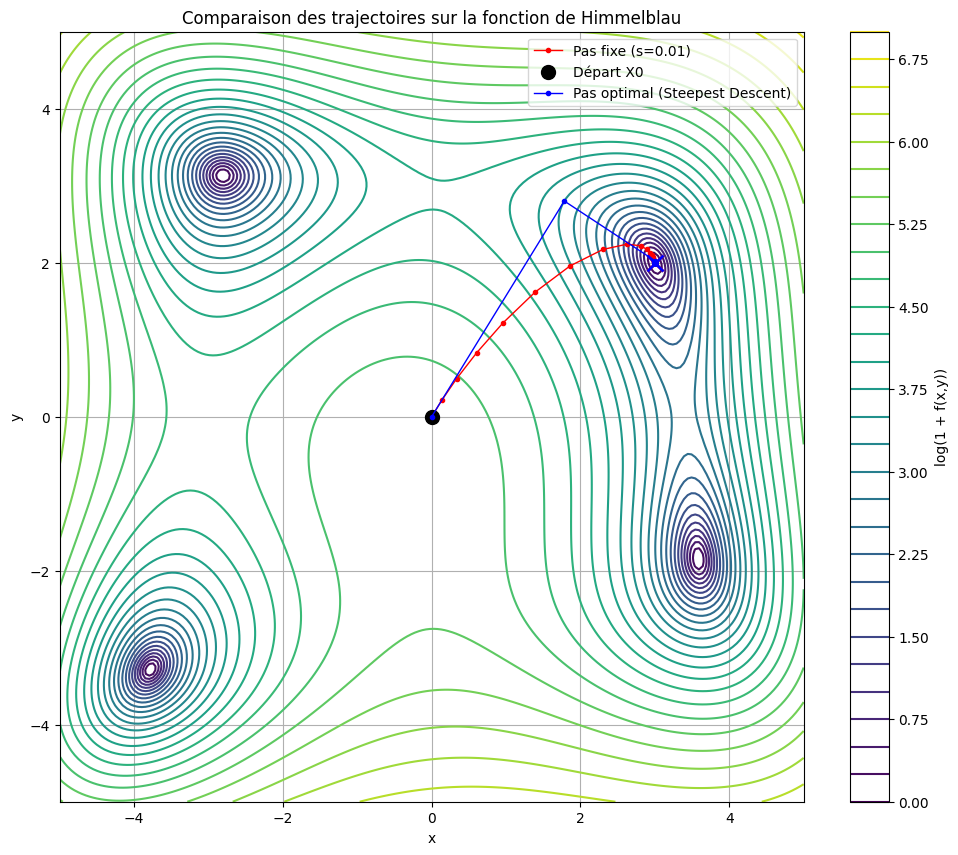

In [10]:
# Création de la grille
x_grid = np.linspace(-5, 5, 200)
y_grid = np.linspace(-5, 5, 200)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
Z_grid = f_num([X_grid, Y_grid])

plt.figure(figsize=(12, 10))

# Contours avec échelle logarithmique pour mieux voir les détails
# On ajoute 1 avant le log pour éviter log(0) si on tombe sur un minimum exact
Z_log = np.log1p(Z_grid) 
contour = plt.contour(X_grid, Y_grid, Z_log, levels=30, cmap='viridis')
plt.colorbar(contour, label='log(1 + f(x,y))')

# Trajectoire Pas Fixe
plt.plot(df_fixe['x_k'], df_fixe['y_k'], 'r.-', label=f'Pas fixe (s={s_test})', linewidth=1)
# Point de départ
plt.plot(X0[0], X0[1], 'ko', markersize=10, label='Départ X0')
# Point d'arrivée Pas Fixe
plt.plot(df_fixe.iloc[-1]['x_k'], df_fixe.iloc[-1]['y_k'], 'rx', markersize=12, markeredgewidth=2)

# Trajectoire Pas Optimal
plt.plot(df_optimal['x_k'], df_optimal['y_k'], 'b.-', label='Pas optimal (Steepest Descent)', linewidth=1)
# Point d'arrivée Pas Optimal
plt.plot(df_optimal.iloc[-1]['x_k'], df_optimal.iloc[-1]['y_k'], 'bx', markersize=12, markeredgewidth=2)


plt.title("Comparaison des trajectoires sur la fonction de Himmelblau")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### Conclusion de l'expérimentation

Le graphique ci-dessus illustre le comportement des deux méthodes.
On observe notamment la caractéristique de la méthode de plus profonde descente (pas optimal) où deux directions successives sont orthogonales, ce qui peut parfois mener à un phénomène de "zig-zag" dans le graphique.

Les données numériques des DataFrames nous permettent de conclure sur le point de convergence atteint et la valeur de la fonction en ce point.